# kmeans clustering: impletations and applications

In [1]:
%run kmeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns

## Outlines
1. Introduction of basic kmeans
2. kmeans++: improvement to basic kmeans
3. Spectral Clustering: further improvement 
4. Application of kmeans
5. Conclusions and takeaways

## Introduction of basic kmeans
- The main idea of basic kmeans algorithm is as following: 
    - 1. Initiate the centriods, randomly selected k points from the input as centroids.
    - 2. Assign each point to the closest centroid as a cluster, and update the new centroids as the mean of each cluster.
    - 3. Update centroids until the centroids will not change much (change<tolerance).
   

### test 1: basic kmeans on a simple data
- We have grades of 16 students, shown in the scatter plot.
- From the scatter plot, there seems to be 4 groups: <80, 80-85, 85-90, >90.

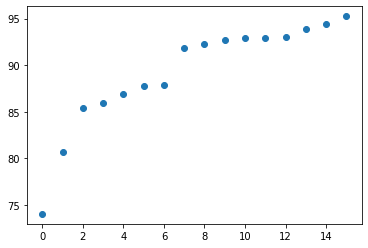

index in original list:
[ 2  7 12  9  3 14 13 10  4  0  8  6 15  1  5 11]


In [2]:
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65,
          92.86, 85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]

plt.scatter(range(len(grades)),sorted(grades))
plt.show()
print("index in original list:")
print(np.argsort(grades))

### Apply basic kmeans, 5 iterations
- Every time we apply the basic kmeans on the grades data, and we color the points by their clusters.
- As shown, basic kmeans fails to detect the true clusters 3/5 times.

iter: 0
centroids:  [[77.355     ]
 [92.58833333]
 [86.762     ]
 [94.52      ]]
vector sample indexes for clusters [[2, 7], [0, 4, 6, 8, 10, 15], [3, 9, 12, 13, 14], [1, 5, 11]]
vector assignments:  [[74.06 80.65]]
vector assignments:  [[92.65 92.26 92.94 92.86 91.79 93.03]]
vector assignments:  [[86.94 85.94 85.37 87.85 87.71]]
vector assignments:  [[93.87 94.46 95.23]]


/Users/liupeng/Documents/GitHub/kmeans-jenniferliumao/kmeans.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if centroids == "kmeans++":


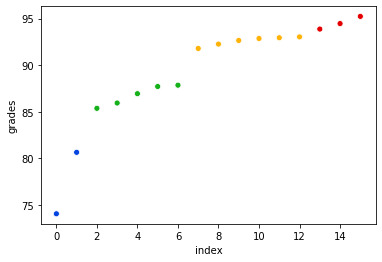


iter: 1
centroids:  [[87.5       ]
 [93.23222222]
 [85.655     ]
 [77.355     ]]
vector sample indexes for clusters [[3, 13, 14], [0, 1, 4, 5, 6, 8, 10, 11, 15], [9, 12], [2, 7]]
vector assignments:  [[86.94 87.85 87.71]]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[85.94 85.37]]
vector assignments:  [[74.06 80.65]]


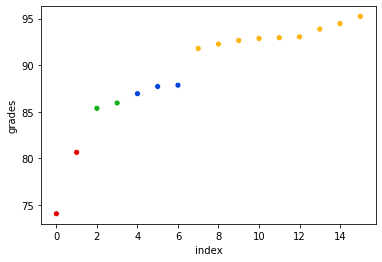


iter: 2
centroids:  [[84.07428571]
 [94.52      ]
 [92.025     ]
 [92.87      ]]
vector sample indexes for clusters [[2, 3, 7, 9, 12, 13, 14], [1, 5, 11], [4, 10], [0, 6, 8, 15]]
vector assignments:  [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
vector assignments:  [[93.87 94.46 95.23]]
vector assignments:  [[92.26 91.79]]
vector assignments:  [[92.65 92.94 92.86 93.03]]


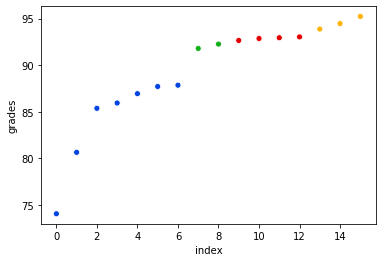


iter: 3
centroids:  [[84.07428571]
 [94.52      ]
 [92.025     ]
 [92.87      ]]
vector sample indexes for clusters [[2, 3, 7, 9, 12, 13, 14], [1, 5, 11], [4, 10], [0, 6, 8, 15]]
vector assignments:  [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]
vector assignments:  [[93.87 94.46 95.23]]
vector assignments:  [[92.26 91.79]]
vector assignments:  [[92.65 92.94 92.86 93.03]]


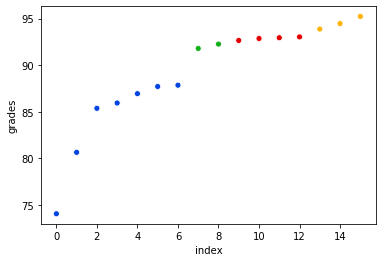


iter: 4
centroids:  [[93.23222222]
 [85.655     ]
 [87.5       ]
 [77.355     ]]
vector sample indexes for clusters [[0, 1, 4, 5, 6, 8, 10, 11, 15], [9, 12], [3, 13, 14], [2, 7]]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[85.94 85.37]]
vector assignments:  [[86.94 87.85 87.71]]
vector assignments:  [[74.06 80.65]]


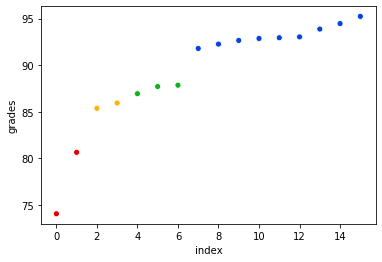

In [3]:
k = 4
grades = np.array(grades).reshape(-1, 1)
for i in range(5):
    print("iter:", i)
    # apply basic kmeans
    centroids, clusters = kmeans(grades, k)
    print("centroids: ", centroids)
    print("vector sample indexes for clusters", clusters)
    for j in range(k):
        print("vector assignments: ", grades[clusters[j]].reshape(1, -1))
    # get the label of each observation
    y_pred = np.zeros(len(grades))
    for idx, cluster in enumerate(clusters):
        y_pred[cluster] = idx
    # plot
    df = pd.DataFrame({"grades": grades.flatten(), "cluster": y_pred.flatten(
    )}).sort_values("grades").reset_index(drop=True).reset_index()
    sns.scatterplot("index", "grades", hue="cluster", data=df, palette=sns.xkcd_palette(
        ["blue", "amber", "green", "red"]), legend=None)
    plt.show()
    print("")

## How to improve basic kmeans? kmeans++!
- It is obvious that basic kmeans cannot give us a stable clustering, because the algorithm is very sensitive to the choice of the initial centroids which are randomly chosen in basic kmeans. 
- One general choice to choose the initial centroids is a simple kmeans++ method. The basic idea is as below:
    - 1. Randomly pick the first of k centroids. 
    - 2. Pick next k-1 points by selecting points that maximize the minimum distance to  all existing cluster centroids: 
        - For each point, compute the minimum distance to each cluster. 
        - Among those min distances to clusters for each point, find the max distance. The associated point is the new centroid.

### test 1 continued: Apply kmeans++ on the grade data, 5 iterations
- Every time we apply the kmeans++ on the grades data, and we color the points by their clusters.
- As shown, kmeans++ successfully detects the true clusters 5/5 times.

iter: 0
centroids:  [[86.762     ]
 [74.06      ]
 [93.23222222]
 [80.65      ]]
vector sample indexes for clusters [[3, 9, 12, 13, 14], [2], [0, 1, 4, 5, 6, 8, 10, 11, 15], [7]]
vector assignments:  [[86.94 85.94 85.37 87.85 87.71]]
vector assignments:  [[74.06]]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[80.65]]


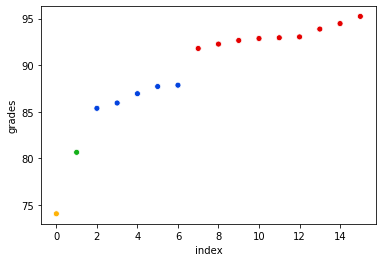


iter: 1
centroids:  [[93.23222222]
 [74.06      ]
 [86.762     ]
 [80.65      ]]
vector sample indexes for clusters [[0, 1, 4, 5, 6, 8, 10, 11, 15], [2], [3, 9, 12, 13, 14], [7]]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[74.06]]
vector assignments:  [[86.94 85.94 85.37 87.85 87.71]]
vector assignments:  [[80.65]]


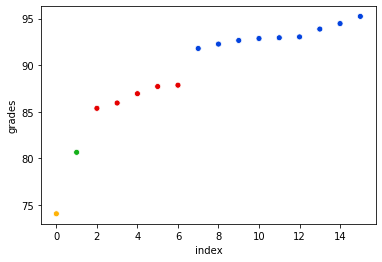


iter: 2
centroids:  [[93.23222222]
 [74.06      ]
 [86.762     ]
 [80.65      ]]
vector sample indexes for clusters [[0, 1, 4, 5, 6, 8, 10, 11, 15], [2], [3, 9, 12, 13, 14], [7]]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[74.06]]
vector assignments:  [[86.94 85.94 85.37 87.85 87.71]]
vector assignments:  [[80.65]]


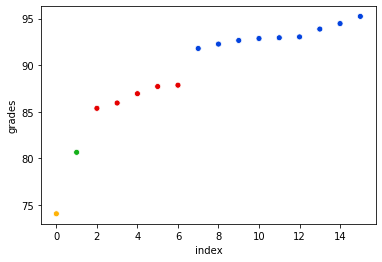


iter: 3
centroids:  [[93.23222222]
 [74.06      ]
 [86.762     ]
 [80.65      ]]
vector sample indexes for clusters [[0, 1, 4, 5, 6, 8, 10, 11, 15], [2], [3, 9, 12, 13, 14], [7]]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[74.06]]
vector assignments:  [[86.94 85.94 85.37 87.85 87.71]]
vector assignments:  [[80.65]]


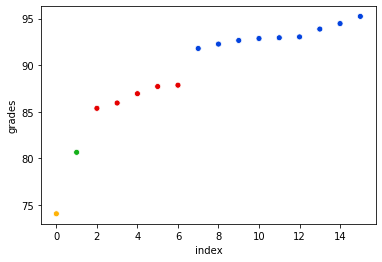


iter: 4
centroids:  [[93.23222222]
 [74.06      ]
 [86.762     ]
 [80.65      ]]
vector sample indexes for clusters [[0, 1, 4, 5, 6, 8, 10, 11, 15], [2], [3, 9, 12, 13, 14], [7]]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]]
vector assignments:  [[74.06]]
vector assignments:  [[86.94 85.94 85.37 87.85 87.71]]
vector assignments:  [[80.65]]


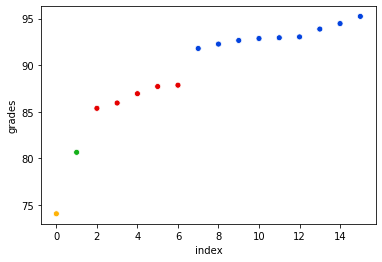

In [4]:
k = 4
grades = np.array(grades).reshape(-1, 1)
for i in range(5):
    print("iter:", i)
    # apply kmeans++
    centroids, clusters = kmeans(grades, k, centroids="kmeans++")
    print("centroids: ", centroids)
    print("vector sample indexes for clusters", clusters)
    for j in range(k):
        print("vector assignments: ", grades[clusters[j]].reshape(1, -1))
    # get the label of each observation
    y_pred = np.zeros(len(grades))
    for idx, cluster in enumerate(clusters):
        y_pred[cluster] = idx
    # plot
    df = pd.DataFrame({"grades": grades.flatten(), "cluster": y_pred.flatten(
    )}).sort_values("grades").reset_index(drop=True).reset_index()
    sns.scatterplot("index", "grades", hue="cluster", data=df, palette=sns.xkcd_palette(
        ["blue", "amber", "red", "green"]), legend=None)
    plt.show()
    print("")

## Application of kmeans on labeled data: how to measure accuracy?
- The basic idea of generating a confusion matrix based on clustering results is as following:
    - 1. Find the most common prediction in each cluster and then assume that is the prediction.
    - 2. Assign each element in that cluster with the most common prediction.
    - 3. Compare those results (y_pred) to the known y, the accuracy is then calculated by the normal definition of accuracy. 

### test 2: kmeans++ on cancer data
- The accuracy is about 85%.

In [5]:
# test case for kmeans++
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # 0=cancer,1=benign

cancer = 0
benign = 1

k=2
centroids, clusters = kmeans(X,k,centroids="kmeans++")
likely_confusion_matrix(y, clusters)

       pred 0  pred 1
Truth                
0         130      82
1           1     356
clustering accur 0.8541300527240774


## Further improvement of kmeans++: Spectral Clustering
- Spectral Clustering captures the local structure of the data better, the basic idea is as following:
    - 1. Construct a similarity graph.
    - 2. Determine the Adjacency matrix W, Degree matrix D and the Laplacian matrix L.
    - 3. Compute the eigenvectors of the matrix L.
    - 4. Using the 2nd to kth smallest eigenvector as input, apply kmeans++ model and use it to classify the data.


- How to obtain the similarity matrix? Here we apply Breiman's RF to define it:
    - 1. Consider all X records as as class 0
    - 2. Duplicate and bootstrap columns of X to get X’: class 1
    - 3. Create y to label X vs X’
    - 4. Train RF on stacked [X,X’] → y
    - 5. Walk all leaves of all trees, bumping proximity[i,j] for all 𝑥i, 𝑥j pairs in leaf; divide proximities by num of leaves.
    

### test 2 continued: similarity matrix and spectral clustering on the cancer data
- Generate similarity matrix from the cancer data.
- Apply spectral clustering on the similarity matrix.
- The confusion matrix shows that the accuracy imporves from 85% to 92%.

In [6]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # 0=cancer,1=benign

cancer = 0
benign = 1

k = 2

S = similarity_matrix(X)

cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
cluster.fit_predict(S) # pass similarity matrix not X
labels = cluster.labels_
classes = np.unique(labels)
clusters = []
for i in range(len(classes)):
    clusters.append(np.nonzero(labels == classes[i])[0].tolist())

likely_confusion_matrix(y, clusters)

       pred 0  pred 1
Truth                
0         195      17
1          44     313
clustering accur 0.8927943760984183


## Application of kmeans to image compression
- Rather than use millions of colors, we can usually get away with 256 or even 64 colors. The key is choosing the right colors that are representative for that image. The way to do that is to cluster in p=3 space for (red,green,blue) vectors.
- After clustering, we assign one of the values in centroids to each pixel.

### test 3: Greyscale image
- We use only 4 colors here to reconstruct the original image.

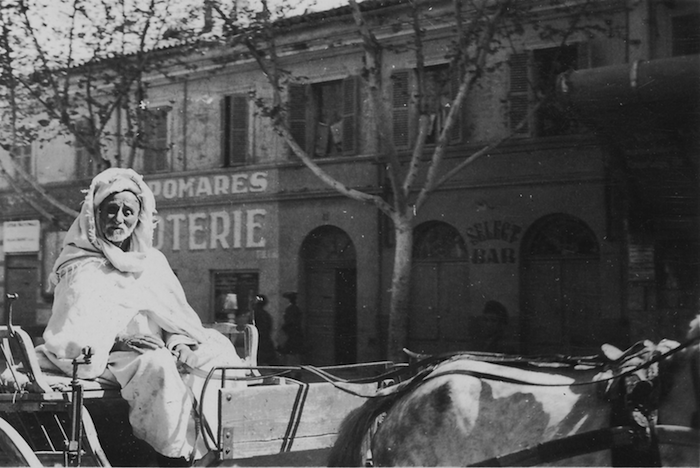

In [7]:
img = Image.open('north-africa-1940s-grey.png').convert("L")
img

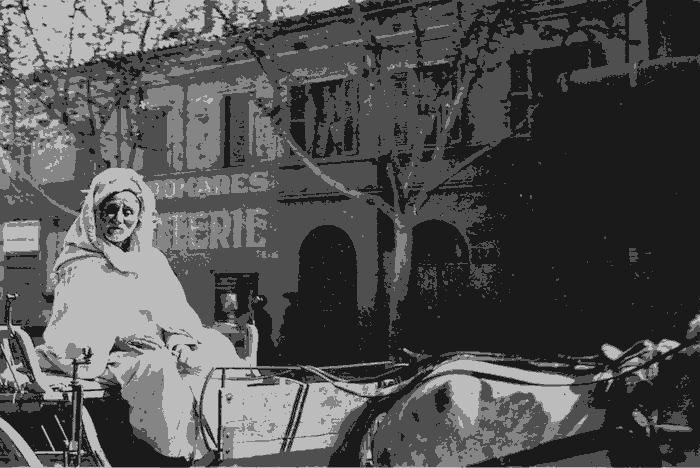

In [8]:
X = np.array(img).flatten().astype(float).reshape(-1,1) 
h = img.height
w = img.width
X_ = np.unique(X, axis=0) 

k=4
centroids, clusters = kmeans(X_, k=k, centroids='kmeans++', tolerance=.01)
reassign_color(X, centroids)
img_ = Image.fromarray(X.astype(np.uint8).reshape(h,w), 'L') # L means grayscale
img_.save("4color.png")
img_

### test 4: Color image
- We use only 32 colors here to reconstruct the original image.

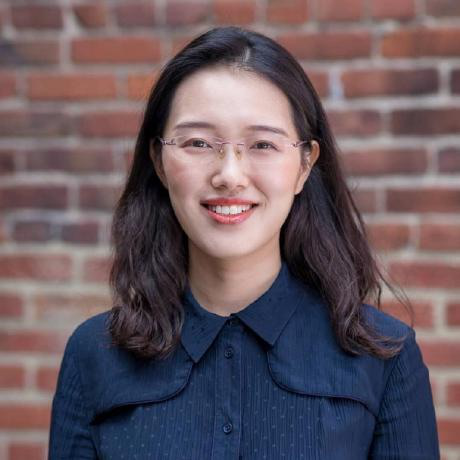

In [14]:
img = Image.open('mylogo.jpeg')
img

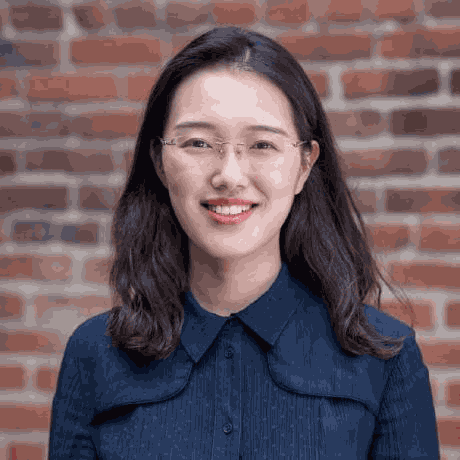

In [15]:
X = np.array(img).flatten().astype(float).reshape(-1,3) 
h = img.height
w = img.width
X_ = np.unique(X, axis=0)

k = 32
centroids, clusters = kmeans(X_, k=k, centroids='kmeans++', tolerance=.01)
reassign_color(X, centroids)
img_ = Image.fromarray(X.astype(np.uint8).reshape(h,w,3)) 
img_.save("32colorPL.png")

img_

## Application of kmeans to hand writing recognition
- Each observation in this dataset is a image of a hand written digit.

### test 5: accuracy comparison between kmeans and kmeans++
- On this dataset, basic kmeans has better performance (2% more accuracy) than kmeans++.

In [17]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)



n_digits = len(np.unique(y_digits))
labels = y_digits

kmeans_acc = []
kmeansPlus_acc = []

for i in range(1000):
    centroids, clusters = kmeans(X_digits,n_digits)
    kmeans_acc.append(likely_confusion_matrix_(y_digits, clusters))
    centroids, clusters = kmeans(X_digits,n_digits,centroids="kmeans++")
    kmeansPlus_acc.append(likely_confusion_matrix_(y_digits, clusters))
print("kmeans:")
print("\taccuracy mean:",np.mean(kmeans_acc))
print("\taccuracy std:",np.std(kmeans_acc))
print("kmeans++:")
print("\taccuracy mean:",np.mean(kmeansPlus_acc))
print("\taccuracy std:",np.std(kmeansPlus_acc))

/Users/liupeng/Documents/GitHub/kmeans-jenniferliumao/kmeans.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if centroids == "kmeans++":


kmeans:
	accuracy mean: 0.7519888703394547
	accuracy std: 0.04250221599302442
kmeans++:
	accuracy mean: 0.7350244852531999
	accuracy std: 0.037871918725340445


## More illustrative examples

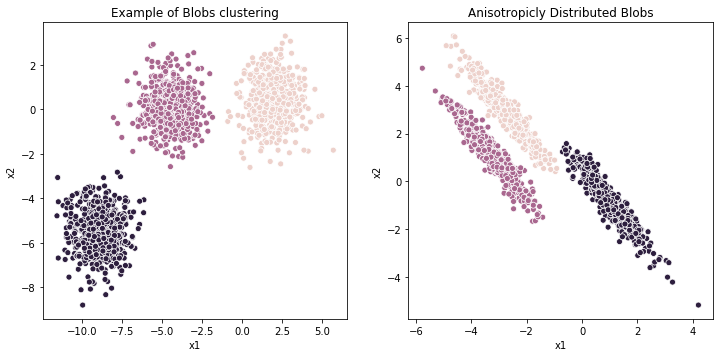

In [18]:
# Example of Blobs clustering
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

centroids, clusters = kmeans(X,3)

y_pred = np.zeros(n_samples)
for idx, cluster in enumerate(clusters):
    y_pred[cluster] = idx

df1 = pd.DataFrame(X)
df1.columns=['x1','x2']
df1['y_pred'] = y_pred
plt.subplot(221)
sns.scatterplot(data=df1,x="x1", y="x2", hue="y_pred",legend=None)
plt.title("Example of Blobs clustering")


# Kmeans++ example of anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
centroids, clusters = kmeans(X, 3, centroids="kmeans++")
y_pred = np.zeros(n_samples)
for idx, cluster in enumerate(clusters):
    y_pred[cluster] = idx

df2 = pd.DataFrame(X_aniso)
df2.columns=['x1','x2']
df2['y_pred'] = y_pred
plt.subplot(222)
sns.scatterplot(data=df2,x="x1", y="x2", hue="y_pred",legend=None)
plt.title("Anisotropicly Distributed Blobs")

plt.show()

# Conclusions and takeaways:
- 1. kmeans and kmeans++ were implemented and tested.
- 2. In most cases, kmeans++ is more robust than kmeans.
- 3. Breiman's RF is a very helpful trick for unsupervised learning together with Spectral clustering.